In [221]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, classification_report

---
EDA

In [222]:
raw_df = pd.read_csv("german_credit_raw.csv")

print(raw_df.shape)
print(100*'-*')
raw_df.info()
print(100*'-*')
raw_df.head()

(1010, 21)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   checking_acc_status       1010 non-null   object 
 1   duration                  1010 non-null   object 
 2   cred_hist                 1010 non-null   object 
 3   purpose                   970 non-null    object 
 4   loan_amt                  970 non-null    float64
 5   saving_acc_bonds          1010 non-null   object 
 6   present_employment_since  1010 non-null   object 
 7   installment_rate          1010 non-null   int64  
 8   personal_stat_gender      1010 non-null   object 
 9   other_debtors_guarantors  1010 non-null   object 
 10  present_residenc

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169.0,unknown_no_saving_acc,above_7y,4,male:single,none,4,real_estate,67.0,none,own,2,skilled_official,1,yes,yes,good
1,below_200,48,curr_loans_paid_duly,radio_tv,5951.0,below_100,below_4y,2,female:divorced_or_married,none,2,real_estate,22.0,none,own,1,skilled_official,1,no,yes,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096.0,below_100,below_7y,2,male:single,none,3,real_estate,49.0,none,own,1,unskilled_resident,2,no,yes,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882.0,below_100,below_7y,2,male:single,guarantor,4,life_insurance_or_aggreements,45.0,none,for_free,1,skilled_official,2,no,yes,good
4,below_0,24,delay_in_past,car_new,4870.0,below_100,below_4y,3,male:single,none,4,unknown_or_no_property,53.0,none,for_free,2,skilled_official,2,no,yes,bad


In [223]:
raw_df.describe(include='all')

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
count,1010,1010,1010,970,9.700000e+02,1010,1010,1010.000000,1010,1010,1010.000000,1010,970.000000,1010,1010,1010.000000,1010,1010.000000,1010,1010,1010
unique,4,34,5,11,NaN,5,5,NaN,6,3,NaN,4,NaN,3,5,NaN,4,NaN,2,2,2
top,no_cheking_acc,24,curr_loans_paid_duly,radio_tv,NaN,below_100,below_4y,NaN,male:single,none,NaN,car_or_other,NaN,none,own,NaN,skilled_official,NaN,no,yes,good
freq,397,186,536,267,NaN,609,346,NaN,554,915,NaN,336,NaN,822,717,NaN,637,NaN,603,972,709
mean,NaN,NaN,NaN,NaN,1.355950e+04,NaN,NaN,2.969307,NaN,NaN,2.845545,NaN,35.569072,NaN,NaN,1.405941,NaN,1.155446,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,3.209886e+05,NaN,NaN,1.117501,NaN,NaN,1.102257,NaN,11.470691,NaN,NaN,0.576690,NaN,0.362508,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2.500000e+02,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,-5.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.360250e+03,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.295500e+03,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3.964250e+03,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [224]:
# class balance
raw_df['target'].value_counts(normalize=True)

target
good    0.70198
bad     0.29802
Name: proportion, dtype: float64

In [225]:
# categorical vs numerical split
num_cols = raw_df.select_dtypes(include=['int64','float64']).columns
cat_cols = raw_df.select_dtypes(include=['object']).columns
print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: Index(['loan_amt', 'installment_rate', 'present_residence_since', 'age',
       'num_curr_loans', 'num_people_provide_maint'],
      dtype='object')
Categorical: Index(['checking_acc_status', 'duration', 'cred_hist', 'purpose',
       'saving_acc_bonds', 'present_employment_since', 'personal_stat_gender',
       'other_debtors_guarantors', 'property', 'other_installment_plans',
       'housing', 'job', 'telephone', 'is_foreign_worker', 'target'],
      dtype='object')


In [226]:
!python german_credit_cleanser.py

GERMAN CREDIT DATASET CLEANSER
Loading dataset...
✗ Error loading data: [Errno 2] No such file or directory: 'german_credit_dirty.csv'


---
Loading the clean data and preprocessing

In [227]:
df = pd.read_csv('german_credit_cleaned.csv')

print(df.shape)
print(100*'-*')
df.info()
print(100*'-*')
df.head()

(968, 21)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   checking_acc_status       968 non-null    object 
 1   duration                  968 non-null    int64  
 2   cred_hist                 968 non-null    object 
 3   purpose                   968 non-null    object 
 4   loan_amt                  968 non-null    float64
 5   saving_acc_bonds          968 non-null    object 
 6   present_employment_since  968 non-null    object 
 7   installment_rate          968 non-null    int64  
 8   personal_stat_gender      968 non-null    object 
 9   other_debtors_guarantors  968 non-null    object 
 10  present_residence_s

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169.0,unknown_no_saving_acc,above_7y,4,male:single,none,4,real_estate,67.0,none,own,2,skilled_official,1,yes,yes,good
1,below_200,48,curr_loans_paid_duly,radio_tv,5951.0,below_100,below_4y,2,female:divorced_or_married,none,2,real_estate,22.0,none,own,1,skilled_official,1,no,yes,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096.0,below_100,below_7y,2,male:single,none,3,real_estate,49.0,none,own,1,unskilled_resident,2,no,yes,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882.0,below_100,below_7y,2,male:single,guarantor,4,life_insurance_or_aggreements,45.0,none,for_free,1,skilled_official,2,no,yes,good
4,below_0,24,delay_in_past,car_new,4870.0,below_100,below_4y,3,male:single,none,4,unknown_or_no_property,53.0,none,for_free,2,skilled_official,2,no,yes,bad


In [228]:
df.describe(include='all')

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
count,968,968.000000,968,968,968.000000,968,968,968.000000,968,968,968.000000,968,968.000000,968,968,968.000000,968,968.000000,968,968,968
unique,4,NaN,5,11,NaN,5,5,NaN,6,3,NaN,4,NaN,3,5,NaN,4,NaN,2,2,2
top,no_cheking_acc,NaN,curr_loans_paid_duly,radio_tv,NaN,below_100,below_4y,NaN,male:single,none,NaN,car_or_other,NaN,none,own,NaN,skilled_official,NaN,no,yes,good
freq,382,NaN,514,267,NaN,582,327,NaN,525,880,NaN,321,NaN,788,690,NaN,608,NaN,572,932,676
mean,NaN,20.815083,NaN,NaN,3255.504132,NaN,NaN,2.977273,NaN,NaN,2.846074,NaN,35.617769,NaN,NaN,1.405992,NaN,1.154959,NaN,NaN,NaN
std,NaN,11.953110,NaN,NaN,2830.040954,NaN,NaN,1.121151,NaN,NaN,1.100937,NaN,11.406133,NaN,NaN,0.580131,NaN,0.362052,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1359.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2295.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3960.750000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


---
Encoding and training the model

In [229]:
# Target encoding

y = df['target'].astype(str)
le = LabelEncoder()
y_enc = le.fit_transform(y)

X = df.drop(columns=['target'])

In [230]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.20, stratify=y_enc, random_state=42
)

In [231]:
# Converting categorical cols to category datatype

cat_cols = X.select_dtypes(include=["object"]).columns
for col in cat_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

In [232]:
# Compute imbalance ratio

n_pos = (y_train == 1).sum()
n_neg = (y_train == 0).sum()
scale_pos_weight = n_neg / n_pos

In [233]:
# Train XGBoost with categorical support

xgb_clf = xgb.XGBClassifier(
    tree_method="hist",
    enable_categorical=True,
    n_estimators=500,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    early_stopping_rounds=30,
    eval_metric='auc',
    random_state=42,
    scale_pos_weight=scale_pos_weight
    )

In [234]:
xgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-auc:0.57414
[1]	validation_0-auc:0.69115
[2]	validation_0-auc:0.69485
[3]	validation_0-auc:0.68236
[4]	validation_0-auc:0.74325
[5]	validation_0-auc:0.77414
[6]	validation_0-auc:0.77828
[7]	validation_0-auc:0.79046
[8]	validation_0-auc:0.79906
[9]	validation_0-auc:0.80885
[10]	validation_0-auc:0.80910
[11]	validation_0-auc:0.81073
[12]	validation_0-auc:0.80452
[13]	validation_0-auc:0.81030
[14]	validation_0-auc:0.81381
[15]	validation_0-auc:0.81971
[16]	validation_0-auc:0.82436
[17]	validation_0-auc:0.82298
[18]	validation_0-auc:0.82486
[19]	validation_0-auc:0.82398
[20]	validation_0-auc:0.82524
[21]	validation_0-auc:0.82398
[22]	validation_0-auc:0.82561
[23]	validation_0-auc:0.82536
[24]	validation_0-auc:0.82637
[25]	validation_0-auc:0.82624
[26]	validation_0-auc:0.82411
[27]	validation_0-auc:0.82310
[28]	validation_0-auc:0.82436
[29]	validation_0-auc:0.82398
[30]	validation_0-auc:0.82172
[31]	validation_0-auc:0.82323
[32]	validation_0-auc:0.82072
[33]	validation_0-au

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,30
,enable_categorical,True
,eval_metric,'auc'


In [235]:
# Scores
y_proba = xgb_clf.predict_proba(X_test)[:,1]
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, (y_proba >= 0.5).astype(int)))

Test ROC AUC: 0.8375392341494037
              precision    recall  f1-score   support

           0       0.56      0.85      0.67        59
           1       0.91      0.70      0.79       135

    accuracy                           0.75       194
   macro avg       0.73      0.78      0.73       194
weighted avg       0.80      0.75      0.76       194



---

In [236]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

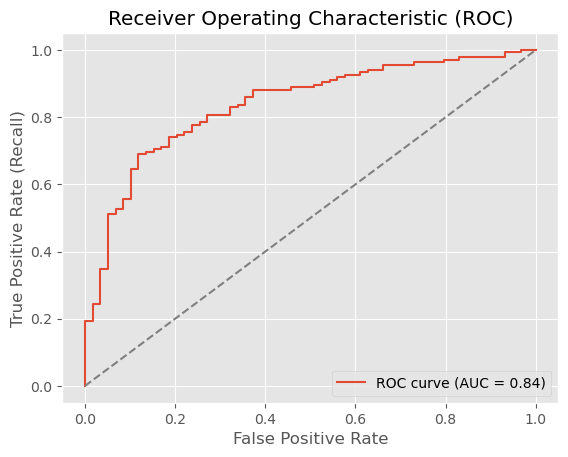

In [237]:
y_proba = xgb_clf.predict_proba(X_test)[:,1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

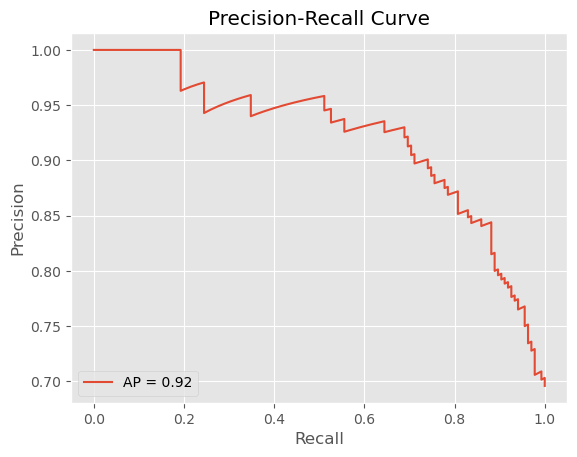

In [238]:
# Precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)


plt.figure()
plt.plot(recall, precision, label=f"AP = {avg_prec:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

---